In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
import kagglehub
ronikdedhia_ipl_first_innings_score_path = kagglehub.dataset_download('ronikdedhia/ipl-first-innings-score')
print('Data source import complete.')

100%|██████████| 739k/739k [00:00<00:00, 26.4MB/s]

Extracting files...
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df.shape

(76014, 15)

In [ ]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [ ]:
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


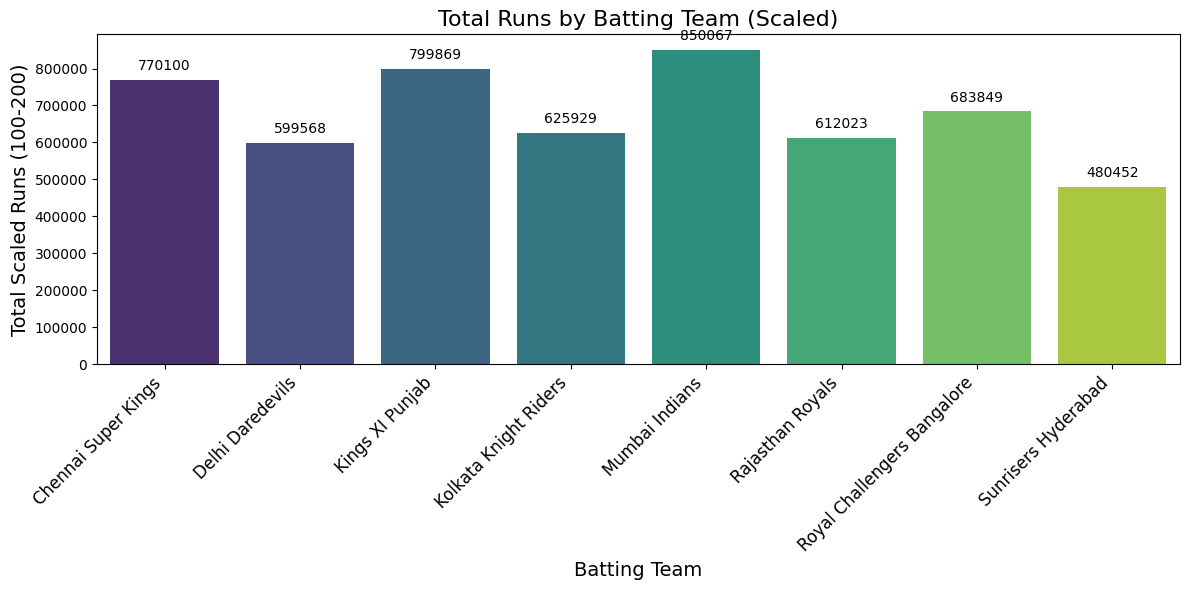

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object (adjust feature range if needed)
scaler = MinMaxScaler(feature_range=(100, 200))

# Fit and transform the 'runs' column for scaling
df['scaled_runs'] = scaler.fit_transform(df[['runs']])

# Calculate total scaled runs for each team
total_scaled_runs = df.groupby('bat_team')['scaled_runs'].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_scaled_runs, x='bat_team', y='scaled_runs', ci=None, palette='viridis') # Using total_scaled_runs and adding color palette
plt.title('Total Runs by Batting Team (Scaled)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Total Scaled Runs (100-200)', fontsize=14)  # Updated y-axis label
plt.tight_layout()

# Annotate bars with values and better positioning
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Changed vertical alignment for better readability
                xytext=(0, 5), textcoords='offset points', fontsize=10, color='black') # Added color and adjusted position

plt.show()

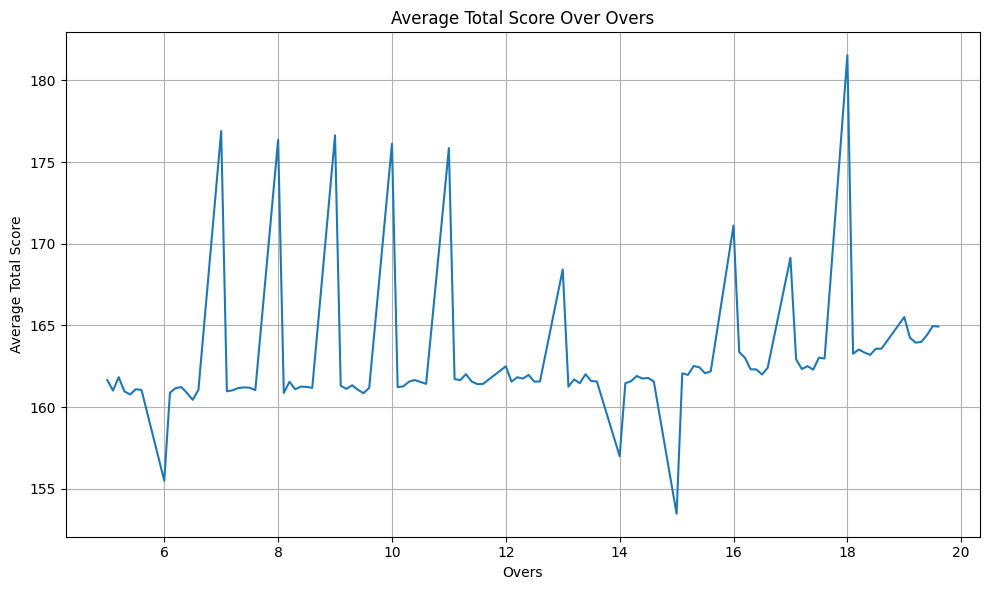

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='overs', y='total', estimator='mean', ci=None)
plt.title('Average Total Score Over Overs')
plt.xlabel('Overs')
plt.ylabel('Average Total Score')
plt.grid(True)
plt.tight_layout()
plt.show()

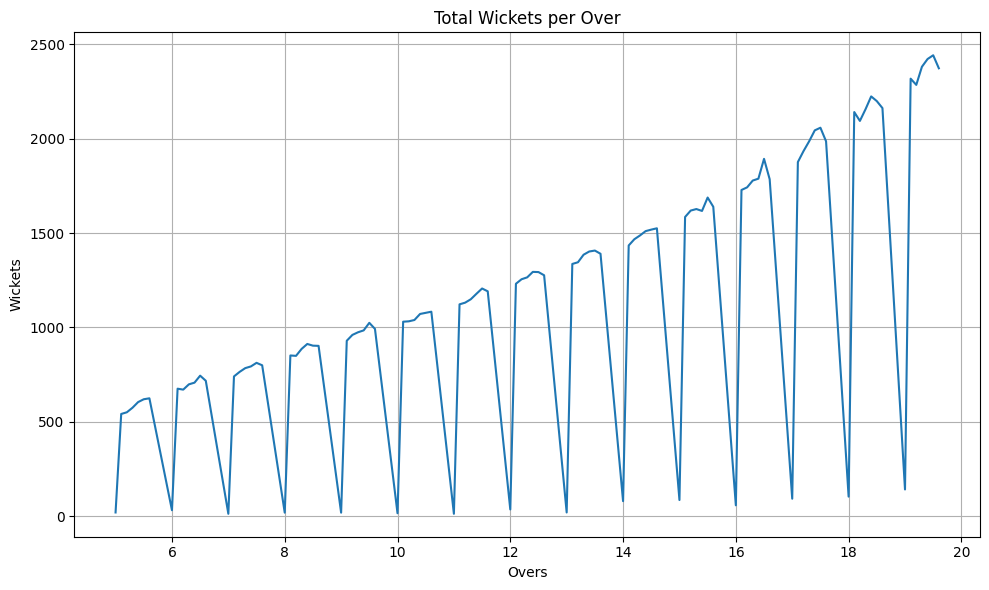

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='overs', y='wickets', estimator='sum', ci=None)
plt.title('Total Wickets per Over')
plt.xlabel('Overs')
plt.ylabel('Wickets')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'scaled_runs', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

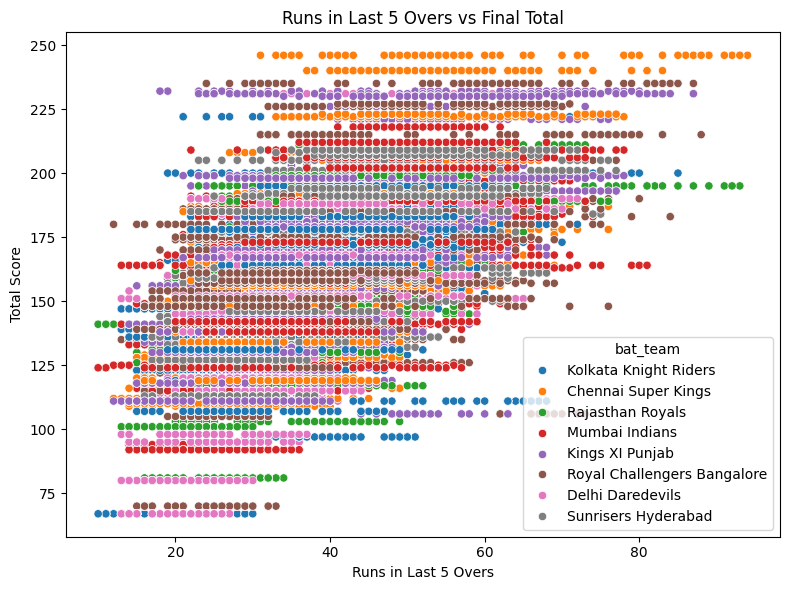

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='runs_last_5', y='total', hue='bat_team')
plt.title('Runs in Last 5 Overs vs Final Total')
plt.xlabel('Runs in Last 5 Overs')
plt.ylabel('Total Score')
plt.tight_layout()
plt.show()

In [ ]:
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [ ]:
print(df.columns.tolist())

['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total', 'scaled_runs']


In [ ]:
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


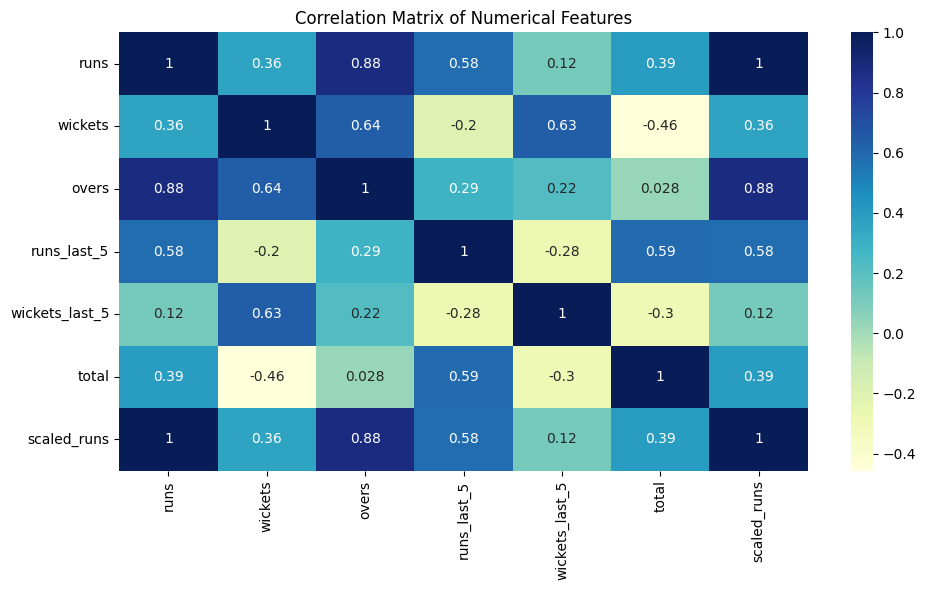

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = linear_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = decision_regressor.predict(X_test)

In [ ]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.138948884089274
Mean Squared Error (MSE): 535.0914326853851
Root Mean Squared Error (RMSE): 23.132043417851893


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = random_regressor.predict(X_test)

In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.873828593712503
Mean Squared Error (MSE): 335.440758800066
Root Mean Squared Error (RMSE): 18.315041872735808


In [ ]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]
  temp_array = np.array([temp_array])
  return int(linear_regressor.predict(temp_array)[0])

Prediction 1 <br/>
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9<br/>

In [ ]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


Prediction 2<br/>
• Date: 7th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 39<br/>
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore<br/>
• First Innings final score: 146/10<br/>

In [ ]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153


Prediction 3<br/>
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>

In [ ]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


Prediction 4<br/>
• Date: 30th March 2019<br/>
• IPL : Season 12<br/>
• Match number: 9<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 176/7<br/>

In [ ]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 179 to 194


Prediction 5<br/>
• Date: 11th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 25<br/>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br/>
• First Innings final score: 151/7<br/>

In [ ]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 128 to 143


Prediction 6<br/>
• Date: 14th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 30<br/>
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils<br/>
• First Innings final score: 155/7<br/>

In [ ]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 157 to 172


Prediction 7<br/>
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9<br/>

In [ ]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


In [ ]:
def predict_score_dynamic():
  batting_team = input("Enter the batting team: ")
  bowling_team = input("Enter the bowling team: ")
  overs = float(input("Enter the number of overs: "))
  runs = int(input("Enter the current runs: "))
  wickets = int(input("Enter the current wickets: "))
  runs_in_prev_5 = int(input("Enter runs scored in the last 5 overs: "))
  wickets_in_prev_5 = int(input("Enter wickets lost in the last 5 overs: "))
  temp_array = list()
  teams = ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
           'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
           'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
  batting_team_index = teams.index(batting_team)
  batting_team_encoding = [0] * len(teams)
  batting_team_encoding[batting_team_index] = 1
  temp_array.extend(batting_team_encoding)
  bowling_team_index = teams.index(bowling_team)
  bowling_team_encoding = [0] * len(teams)
  bowling_team_encoding[bowling_team_index] = 1
  temp_array.extend(bowling_team_encoding)
  temp_array.extend([overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5])
  temp_array = np.array([temp_array])
  predicted_score = int(linear_regressor.predict(temp_array)[0])
  print("The final predicted score (range): {} to {}".format(predicted_score - 10, predicted_score + 5))
predict_score_dynamic()

Enter the batting team: Chennai Super Kings
Enter the bowling team: Delhi Daredevils
Enter the number of overs: 15
Enter the current runs: 130
Enter the current wickets: 3
Enter runs scored in the last 5 overs: 30
Enter wickets lost in the last 5 overs: 1
The final predicted score (range): 170 to 185
